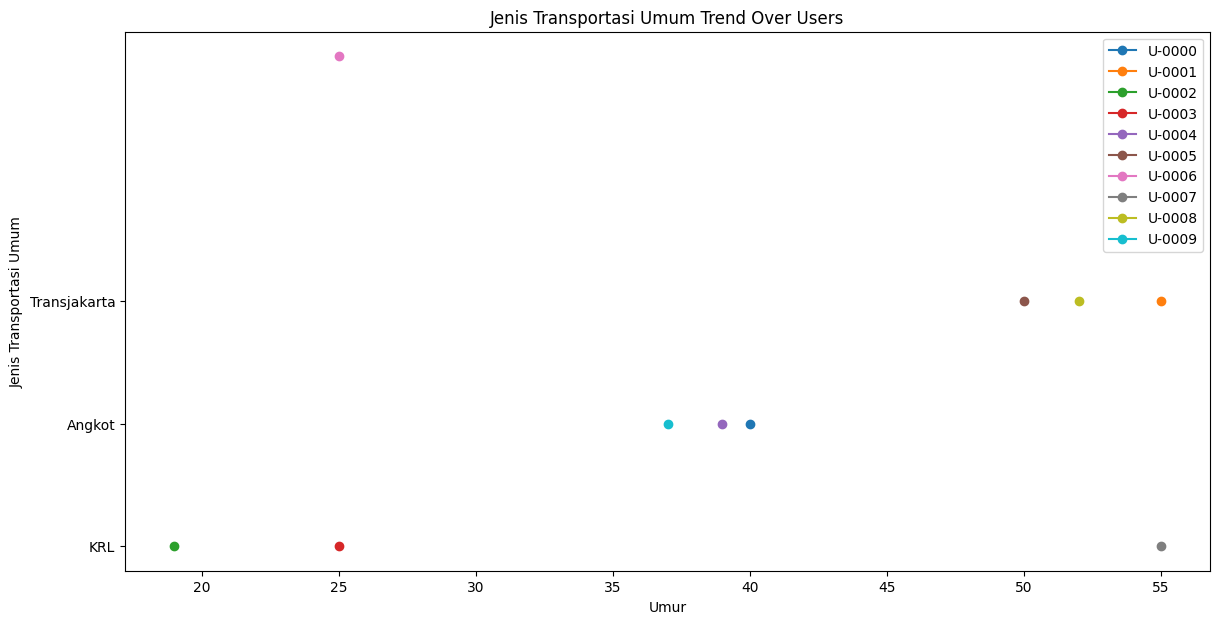

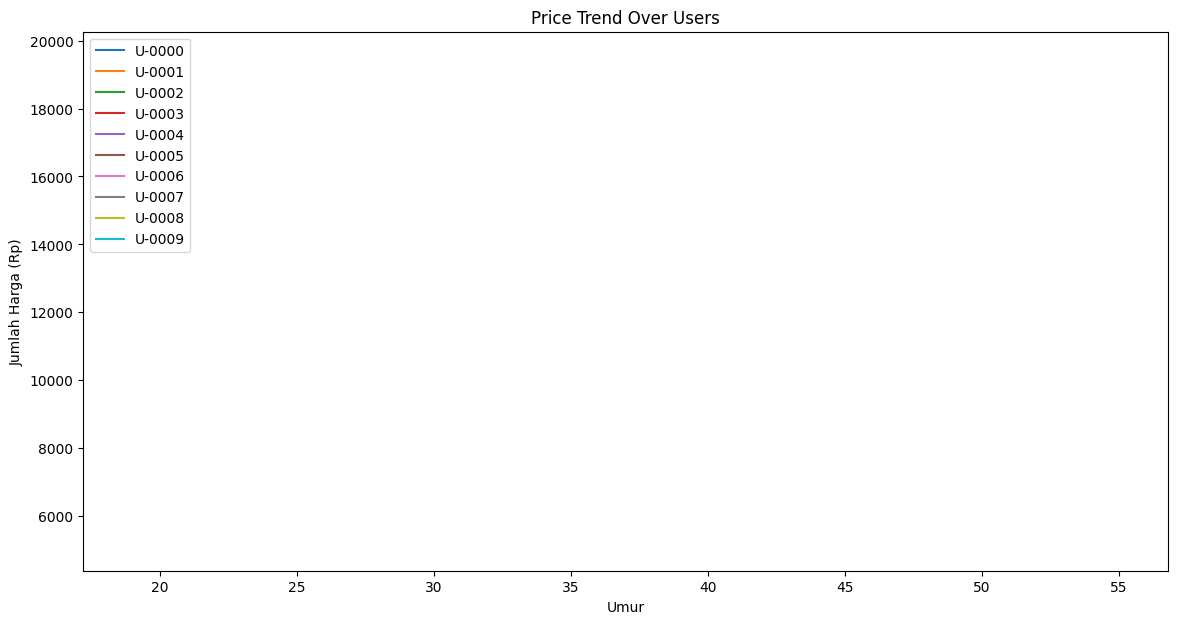

,User ID,Umur,Jenis Kelamin,Lokasi Jemputan,Lokasi Tujuan,Jenis Transportasi Umum,Jumlah Harga,Transport Num
0,U-0000,40,Perempuan,Taman Impian Jaya Ancol Beach City,Jakarta Aquarium,Angkot,5117,2
1,U-0001,55,Perempuan,Taman Mini Indonesia Indah (TMII),Taman Wisata Alam Mangrove Angke Kapuk,Transjakarta,19539,3
2,U-0002,19,Perempuan,Kebun Binatang Ragunan,Kebun Binatang Ragunan,KRL,12039,1
3,U-0003,25,Perempuan,Taman Ismail Marzuki,Taman Menteng,KRL,14579,1
4,U-0004,39,Perempuan,Dunia Fantasi (Dufan),Taman Wisata Alam Mangrove Angke Kapuk,Angkot,5797,2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to determine transportation type based on age and gender
def determine_transportation(age, gender):
    if gender == 'Perempuan':
        flag = np.random.randint(1, 10)
        if flag < 7 and age < 35:
            return 'Taxi'
        elif age < 35:
            return 'KRL'
        elif 30 <= age <= 45:
            return 'Angkot'
        else:
            return 'Transjakarta'

    elif gender == 'Laki-laki':
        flag = np.random.randint(1, 10)
        if flag < 7 and age < 35:
            return 'Ojek'
        elif age < 35:
            return 'Angkot'
        elif 30 <= age <= 45:
            return 'Transjakarta'
        else:
            return 'KRL'

        ## tambah MRT, LRT

# Function to generate random user data
def generate_random_user_data(num_users=1000):
    user_data = []
    locations = [
        'Monumen Nasional (Monas)', 'Taman Mini Indonesia Indah (TMII)', 'Ancol Taman Impian',
        'Kota Tua Jakarta', 'Kebun Binatang Ragunan', 'Dunia Fantasi (Dufan)', 'Museum Nasional Indonesia',
        'Taman Suropati', 'Taman Ismail Marzuki', 'Museum MACAN', 'Planetarium Jakarta',
        'Pulau Seribu', 'Jakarta Aquarium', 'Taman Menteng', 'Setu Babakan', 'Hutan Kota Gelora Bung Karno',
        'Museum Bank Indonesia', 'Pantai Indah Kapuk (PIK)', 'Taman Impian Jaya Ancol Beach City',
        'Taman Wisata Alam Mangrove Angke Kapuk'
    ]

    for i in range(num_users):
        user_id = f'U-{i:04d}'
        age = np.random.randint(18, 65)
        gender = np.random.choice(['Perempuan', 'Laki-laki'])
        pickup_location = np.random.choice(locations)
        destination_location = np.random.choice(locations)
        transport_type = determine_transportation(age, gender)
        price = np.random.randint(5000, 20000)
        user_data.append({
            'User ID': user_id,
            'Umur': age,
            'Jenis Kelamin': gender,
            'Lokasi Jemputan': pickup_location,
            'Lokasi Tujuan': destination_location,
            'Jenis Transportasi Umum': transport_type,
            'Jumlah Harga': f"Rp. {price:,}".replace(',', '.')
        })

    return pd.DataFrame(user_data)
# Generate 1000 user data
df_combined = generate_random_user_data(1000)

# Convert 'Jumlah Harga' to integer for plotting
df_combined['Jumlah Harga'] = df_combined['Jumlah Harga'].apply(lambda x: int(x.replace('Rp. ', '').replace('.', '')))

# Function to map transportation types to numeric values for plotting
transport_mapping = {'KRL': 1, 'Angkot': 2, 'Transjakarta': 3, 'Ojek':4, 'Taxi':5}
df_combined['Transport Num'] = df_combined['Jenis Transportasi Umum'].map(transport_mapping)

# Plotting the transportation trend
plt.figure(figsize=(14, 7))
for user in df_combined['User ID'].unique()[:10]:  # Only plot the first 10 users for readability
    user_data = df_combined[df_combined['User ID'] == user]
    plt.plot(user_data['Umur'], user_data['Transport Num'], label=user, marker='o')
plt.title('Jenis Transportasi Umum Trend Over Users')
plt.xlabel('Umur')
plt.ylabel('Jenis Transportasi Umum')
plt.yticks([1, 2, 3], ['KRL', 'Angkot', 'Transjakarta'])
plt.legend()
plt.show()

# Plotting the price trend
plt.figure(figsize=(14, 7))
for user in df_combined['User ID'].unique()[:10]:  # Only plot the first 10 users for readability
    user_data = df_combined[df_combined['User ID'] == user]
    plt.plot(user_data['Umur'], user_data['Jumlah Harga'], label=user)
plt.title('Price Trend Over Users')
plt.xlabel('Umur')
plt.ylabel('Jumlah Harga (Rp)')
plt.legend()
plt.show()

# Display the first few rows of the generated data
df_combined.head()


In [5]:
df_combined

,User ID,Umur,Jenis Kelamin,Lokasi Jemputan,Lokasi Tujuan,Jenis Transportasi Umum,Jumlah Harga,Transport Num
0,U-0000,40,Perempuan,Taman Impian Jaya Ancol Beach City,Jakarta Aquarium,Angkot,5117,2
1,U-0001,55,Perempuan,Taman Mini Indonesia Indah (TMII),Taman Wisata Alam Mangrove Angke Kapuk,Transjakarta,19539,3
2,U-0002,19,Perempuan,Kebun Binatang Ragunan,Kebun Binatang Ragunan,KRL,12039,1
3,U-0003,25,Perempuan,Taman Ismail Marzuki,Taman Menteng,KRL,14579,1
4,U-0004,39,Perempuan,Dunia Fantasi (Dufan),Taman Wisata Alam Mangrove Angke Kapuk,Angkot,5797,2
...,...,...,...,...,...,...,...,...
995,U-0995,48,Perempuan,Taman Mini Indonesia Indah (TMII),Pantai Indah Kapuk (PIK),Transjakarta,5813,3
996,U-0996,50,Perempuan,Taman Suropati,Taman Ismail Marzuki,Transjakarta,8268,3
997,U-0997,52,Perempuan,Monumen Nasional (Monas),Planetarium Jakarta,Transjakarta,18452,3
998,U-0998,62,Laki-laki,Taman Menteng,Kota Tua Jakarta,KRL,12389,1


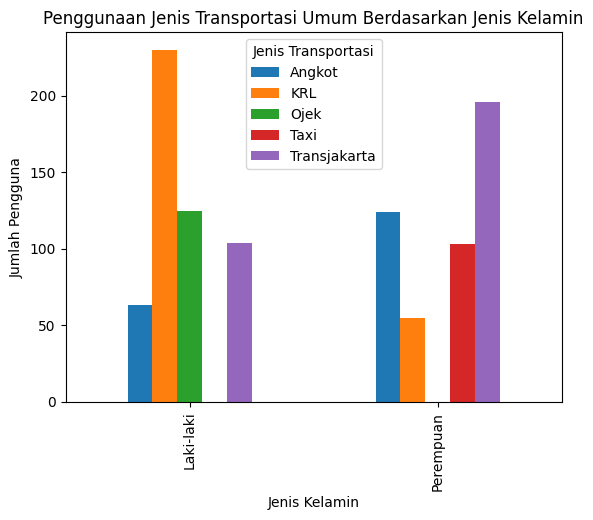

In [6]:
grouped_data = df_combined.groupby(['Jenis Kelamin', 'Jenis Transportasi Umum']).size().unstack(fill_value=0)

# Membuat barchart
grouped_data.plot(kind='bar', stacked=False)

# Menambahkan judul dan label
plt.title('Penggunaan Jenis Transportasi Umum Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Jenis Transportasi')

# Menampilkan plot
plt.show()

<Axes: >

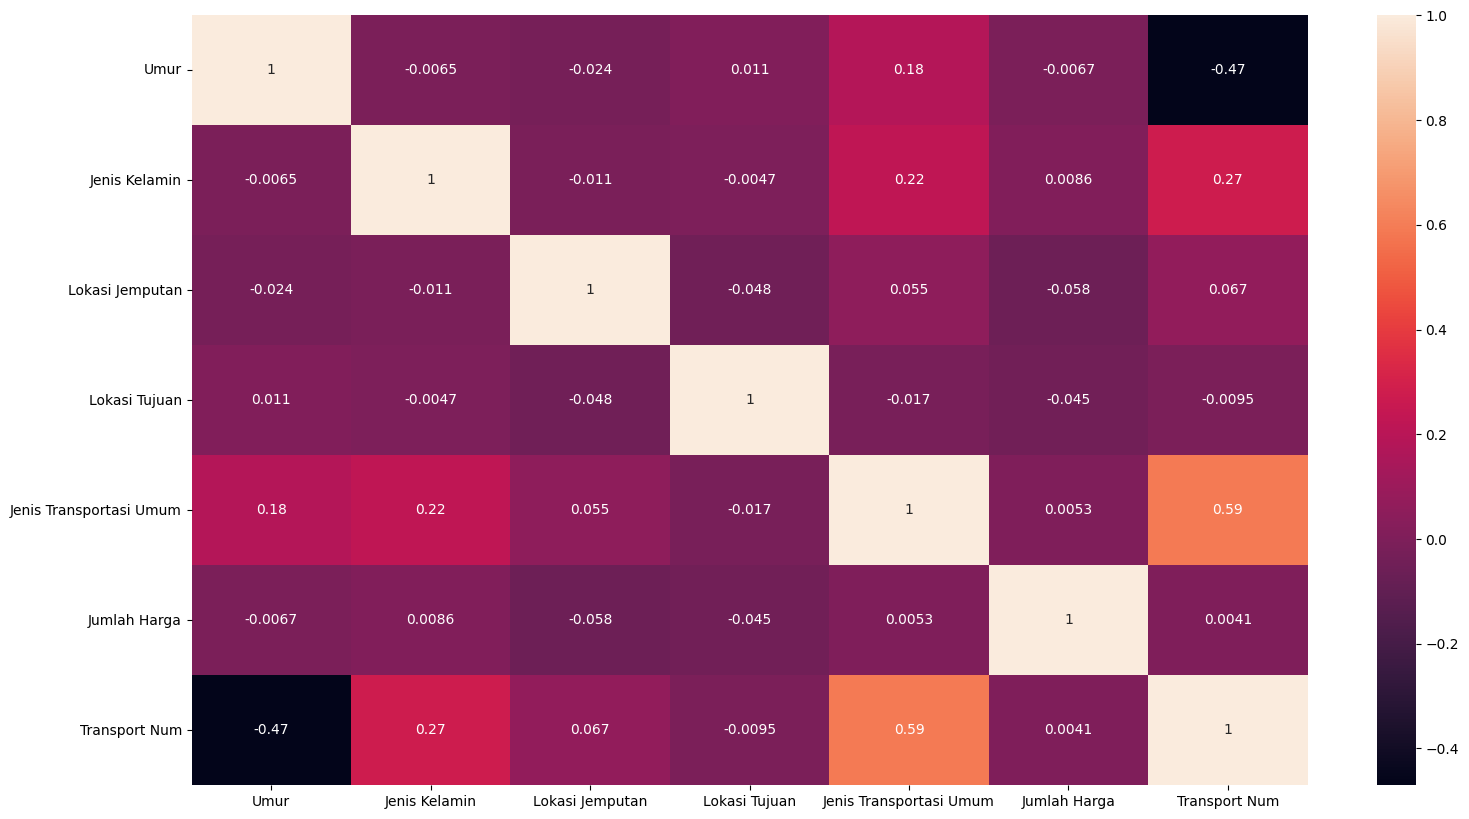

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns



# Drop the 'User ID' column
dataset_hm = df_combined.drop('User ID', axis=1)

# Encode non-numeric columns
for column in dataset_hm.columns:
    if dataset_hm[column].dtype == 'object':
        le = LabelEncoder()
        dataset_hm[column] = le.fit_transform(dataset_hm[column])

# Calculate the Spearman correlation
plt.figure(figsize = (18,10))
sns.heatmap(dataset_hm.corr(), annot=True)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encoding fitur kategorikal
label_encoder = LabelEncoder()

df_combined['Jenis Kelamin'] = label_encoder.fit_transform(df_combined['Jenis Kelamin']).astype('int')
df_combined['Lokasi Jemputan'] = label_encoder.fit_transform(df_combined['Lokasi Jemputan']).astype('int')
df_combined['Lokasi Tujuan'] = label_encoder.fit_transform(df_combined['Lokasi Tujuan']).astype('int')
df_combined['Jenis Transportasi Umum'] = label_encoder.fit_transform(df_combined['Jenis Transportasi Umum']).astype('int')

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


# Memisahkan fitur dan target
X = df_combined[['Jenis Kelamin','Umur', 'Lokasi Jemputan', 'Lokasi Tujuan']]
y = df_combined['Transport Num']

y_encoded = to_categorical(y)


# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Membuat dataset TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((dict(X_train), y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(X_test), y_test))


In [10]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [11]:
# Check fitur categorical
dataset_categorical = X[['Umur','Jenis Kelamin', 'Lokasi Tujuan', 'Lokasi Jemputan']].astype(str)

unique_counts = dataset_categorical.nunique()
unique_values = dataset_categorical.apply(lambda x: x.unique())

pd.DataFrame({'Jumlah Unique Value': unique_counts, 'Unique Value':unique_values})

,Jumlah Unique Value,Unique Value
Umur,47,"[40, 55, 19, 25, 39, 50, 52, 37, 29, 51, 53, 3..."
Jenis Kelamin,2,"[1, 0]"
Lokasi Tujuan,20,"[3, 19, 4, 16, 7, 5, 10, 15, 2, 17, 12, 8, 14,..."
Lokasi Jemputan,20,"[14, 17, 4, 15, 1, 18, 10, 11, 6, 12, 13, 19, ..."


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [13]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_test_scaled

array([[-0.95596841,  0.63570329, -1.50680597,  1.12610807],
       [ 1.04605967, -0.24175919, -1.16160414,  0.44938585],
       [-0.95596841, -0.60736856, -0.98900323,  1.29528863],
       [-0.95596841,  1.29380015,  0.90960681,  1.63364974],
       [-0.95596841,  0.85506891, -1.16160414,  0.95692751],
       [-0.95596841,  0.85506891, -0.64380141,  0.6185664 ],
       [-0.95596841,  0.0507283 ,  0.39180407,  1.29528863],
       [-0.95596841,  0.48945954,  0.90960681,  1.12610807],
       [-0.95596841, -1.26546543,  0.56440499, -0.22733637],
       [-0.95596841, -0.02239357,  1.42740955, -0.22733637],
       [-0.95596841,  1.4400439 , -0.12599867,  0.78774696],
       [ 1.04605967,  0.63570329,  0.7370059 ,  0.6185664 ],
       [ 1.04605967, -0.38800294, -0.12599867,  0.44938585],
       [-0.95596841, -0.82673418,  0.56440499, -1.41160026],
       [-0.95596841,  0.85506891,  0.04660225, -1.2424197 ],
       [-0.95596841, -0.02239357,  0.56440499, -0.56569748],
       [ 1.04605967,  0.

In [15]:
# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2805 - loss: 1.7480 - val_accuracy: 0.4187 - val_loss: 1.5196
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3626 - loss: 1.5025 - val_accuracy: 0.4750 - val_loss: 1.2673
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4467 - loss: 1.2603 - val_accuracy: 0.5375 - val_loss: 1.0364
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 1.0909 - val_accuracy: 0.6313 - val_loss: 0.8526
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 0.9097 - val_accuracy: 0.7500 - val_loss: 0.7176
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.7309 - val_accuracy: 0.8250 - val_loss: 0.6166
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.6216 - val_accuracy: 0.8687 - val_loss: 0.5348
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252 - loss: 0.6010 - val_accuracy: 0.8562 - val_loss:

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8235 - loss: 0.2918
Test Accuracy: 84.50%


In [19]:
X_test_scaled

array([[-0.95596841,  0.63570329, -1.50680597,  1.12610807],
       [ 1.04605967, -0.24175919, -1.16160414,  0.44938585],
       [-0.95596841, -0.60736856, -0.98900323,  1.29528863],
       [-0.95596841,  1.29380015,  0.90960681,  1.63364974],
       [-0.95596841,  0.85506891, -1.16160414,  0.95692751],
       [-0.95596841,  0.85506891, -0.64380141,  0.6185664 ],
       [-0.95596841,  0.0507283 ,  0.39180407,  1.29528863],
       [-0.95596841,  0.48945954,  0.90960681,  1.12610807],
       [-0.95596841, -1.26546543,  0.56440499, -0.22733637],
       [-0.95596841, -0.02239357,  1.42740955, -0.22733637],
       [-0.95596841,  1.4400439 , -0.12599867,  0.78774696],
       [ 1.04605967,  0.63570329,  0.7370059 ,  0.6185664 ],
       [ 1.04605967, -0.38800294, -0.12599867,  0.44938585],
       [-0.95596841, -0.82673418,  0.56440499, -1.41160026],
       [-0.95596841,  0.85506891,  0.04660225, -1.2424197 ],
       [-0.95596841, -0.02239357,  0.56440499, -0.56569748],
       [ 1.04605967,  0.

In [20]:
# Making predictions
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Display first 5 predictions and their true classes
print(f'Predicted classes: {predicted_classes[:5]}')
print(f'True classes: {np.argmax(y_test[:5], axis=1)}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted classes: [1 2 4 1 1]
True classes: [1 2 4 1 1]


In [21]:
!pip install tensorflowjs


In [22]:
import tensorflowjs as tfjs

In [23]:
tfjs.converters.save_keras_model(model, "/content")

failed to lookup keras version from the file,
    this is likely a weight only file


In [25]:
!ls

group1-shard1of1.bin  model.json  sample_data


In [26]:
!cat model.json

{"format": "layers-model", "generatedBy": "keras v3.3.3", "convertedBy": "TensorFlow.js Converter v4.20.0", "modelTopology": {"keras_version": "3.3.3", "backend": "tensorflow", "model_config": {"class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": "float32", "layers": [{"class_name": "InputLayer", "config": {"batch_shape": [null, 4], "dtype": "float32", "sparse": false, "name": "input_layer"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "traina

In [27]:
from google.colab import files

In [29]:
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler


transport_mapping = {'KRL': 1, 'Angkot': 2, 'Transjakarta': 3, 'Ojek': 4, 'Taxi': 5}


# Define the input data
input_data = np.array([[2, 50, 9, 5]])

# Normalize the input data using the same scaler used during training
input_data_scaled = scaler.transform(input_data)

# Make a prediction
prediction = model.predict(input_data_scaled)

# Get the predicted class
predicted_class_label = np.argmax(prediction)

# Get the predicted class name
predicted_class_name = None
for name, label in transport_mapping.items():
    if label == predicted_class_label:
        predicted_class_name = name
        break

print(f"The predicted class for a woman aged 25 is: {predicted_class_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
The predicted class for a woman aged 25 is: Angkot
